In [1]:
from contrasttransferfunction import ContrastTransferFunction
from contrasttransferfunction import CtfFit
import numpy as np
import matplotlib.pyplot as plt
from pycistem.core import CTF

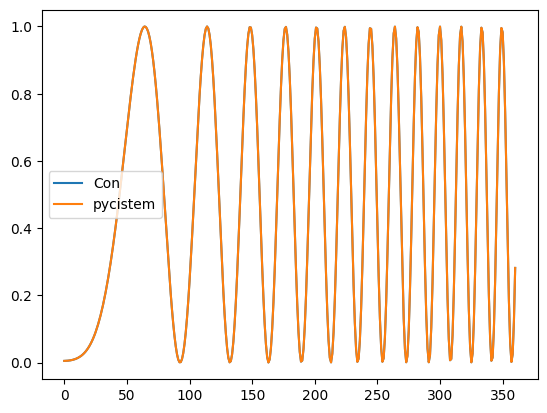

In [2]:
ctf = ContrastTransferFunction(defocus1_angstroms=6000, defocus2_angstroms=6000,pixel_size_angstroms=2.0)
powerspectrum = ctf.powerspectrum_1d
frequency_pixel = ctf.frequency_pixels_1d

cisCTF = CTF(kV=300.0,cs=2.7,ac=0.07,defocus1=6000,defocus2=6000,astig_angle=0.0,pixel_size=2.0)
cisTEM_powerspectrum = np.array([cisCTF.Evaluate(freq**2.0,0.0)**2.0 for freq in frequency_pixel])

plt.plot(powerspectrum,label="Con")
plt.plot(cisTEM_powerspectrum,label="pycistem")
plt.legend()

In [3]:
print("Wavelength")
print(cisCTF.GetWavelength())
print(ctf.wavelength_pixels)
print("CS")
print(cisCTF.GetSphericalAberration())
print(ctf.spherical_aberration_pixels)
print("DF")
print(cisCTF.GetDefocus1())
print(ctf.defocus1_pixels)

Wavelength
0.009843485429883003
0.009843485037807265
CS
13500000.0
13500000.0
DF
3000.0
3000.0


In [4]:
spectrum = np.load("../tests/test_data/spectrum.npy")


In [5]:
fitr = CtfFit.fit_1d(spectrum,pixel_size_angstrom=4.24)

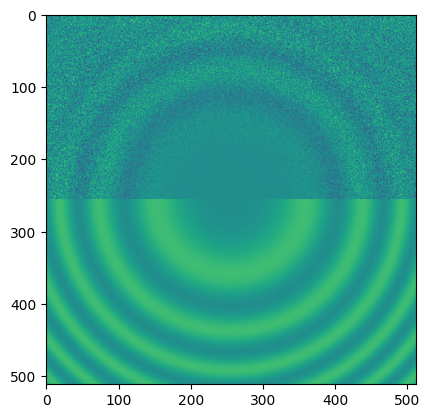

In [6]:
plt.imshow(fitr.create_overlay())

In [7]:
from contrasttransferfunction import CtfFit, ContrastTransferFunction
import numpy as np

ctf = ContrastTransferFunction(defocus1_angstroms=12000, pixel_size_angstroms=4.0)

fit_d = CtfFit.fit_1d(ctf.powerspectrum_2d,pixel_size_angstrom=4.0)

In [8]:
fit_d.ctf

ContrastTransferFunction(defocus1_angstroms=10983.026652349838, defocus2_angstroms=10983.026652349838, defocus_angle_degrees=0.0, additional_phase_shift_degrees=0.0, voltage_kv=300.0, spherical_aberration_mm=2.7, amplitude_contrast=0.07, pixel_size_angstroms=4.0, box_size=512)

In [9]:
import matplotlib.pyplot as plt

plt.imshow(fit_d.defocus)

AttributeError: 'CtfFit' object has no attribute 'defocus'

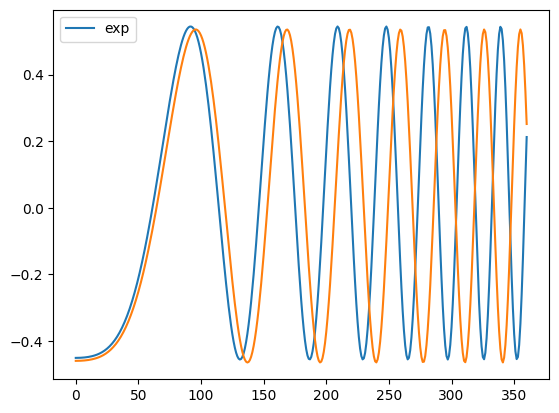

In [ ]:
plt.plot(ctf.powerspectrum_1d-np.mean(ctf.powerspectrum_1d),label="exp")
plt.plot(fit_d.comparison_array[fit_d.fit_index,:])
plt.legend()

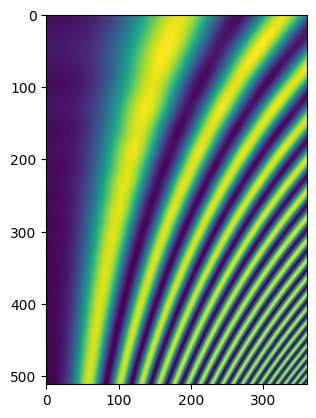

In [ ]:
plt.imshow(fit_d.comparison_array)

In [ ]:
from contrasttransferfunction import CtfFit, ContrastTransferFunction
import numpy as np

ctf = ContrastTransferFunction(defocus1_angstroms=12000, pixel_size_angstroms=4.0)

fit_d = CtfFit.fit_1d(ctf.powerspectrum_2d,pixel_size_angstrom=4.0)

(512, 361)
(512, 1)


In [ ]:
fit_d.ctf

ContrastTransferFunction(defocus1_angstroms=10983.026652349838, defocus2_angstroms=10983.026652349838, defocus_angle_degrees=0.0, additional_phase_shift_degrees=0.0, voltage_kv=300.0, spherical_aberration_mm=2.7, amplitude_contrast=0.07, pixel_size_angstroms=4.0, box_size=512)

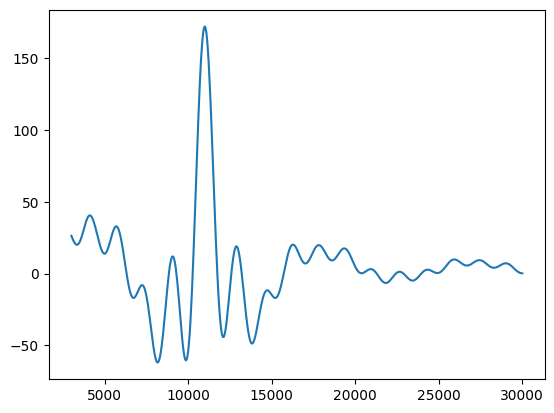

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fit_d.cross_correlation_defocus,fit_d.cross_correlation)


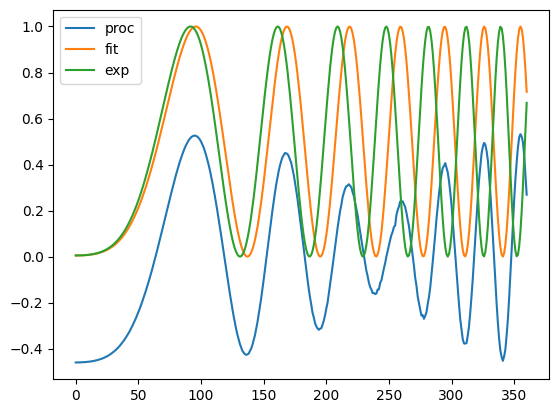

In [ ]:
plt.plot(fit_d.proc_spectrum,label="proc")
plt.plot(fit_d.ctf.powerspectrum_1d,label="fit")
plt.plot(ctf.powerspectrum_1d,label="exp")
plt.legend()

In [ ]:
ctf1 = ContrastTransferFunction(defocus1_angstroms=12000, pixel_size_angstroms=4.0)
ctf2 = ContrastTransferFunction(defocus1_angstroms=10983, pixel_size_angstroms=4.0)

np.correlate(ctf1.powerspectrum_1d,ctf2.powerspectrum_1d)


array([88.6342323])

In [ ]:
np.correlate(ctf1.powerspectrum_1d,ctf1.powerspectrum_1d)

array([121.11585366])

In [ ]:
ctf3 = ContrastTransferFunction(defocus1_angstroms=11562.63, pixel_size_angstroms=4.0)
np.correlate(ctf1.powerspectrum_1d,fit_d.comparison_array[300,:])

array([36.68381901])

In [ ]:
fit_d.fit_index

288

In [ ]:
fit_d.defocus[288,0]

10983.026652349838

In [ ]:
fit_d.defocus[295,0]

TypeError: 'NoneType' object is not subscriptable